<a href="https://colab.research.google.com/github/Vihar2002/Bank-Marketing-Campaign-Analysis-and-Term-Deposit-Prediction/blob/main/Bank_Marketing_Campaign_Analysis_and_Term_Deposit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing Campaign Analysis and Term Deposit Prediction**

# Step 1: Setup KaggleHub for Dataset Access

This project uses the **UCI Bank Marketing Dataset**, which we’ll download directly from Kaggle using the `kagglehub` library.  
KaggleHub simplifies dataset management inside Google Colab by automatically handling paths and versioning.

If you’re running this for the first time, install `kagglehub` below.


In [31]:
!pip install -q kagglehub


# Step 2: Download Dataset from Kaggle



In [32]:
import kagglehub

# Downloading the dataset
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'bank-marketing-dataset' dataset.
Path to dataset files: /kaggle/input/bank-marketing-dataset


# Step 3: Explore Downloaded Files




In [33]:
import os
import pandas as pd

# The path variable comes from kagglehub.dataset_download()
print("Base dataset path:", path)

os.listdir(path)


Base dataset path: /kaggle/input/bank-marketing-dataset


['bank.csv']

In [34]:
import pandas as pd
import os

data_path = os.path.join(path, "bank.csv")

df = pd.read_csv(data_path, sep=',')

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Step 5: Initial Dataset Overview

In [35]:
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
print("\nColumn names:\n", df.columns.tolist())

# Check data types and non-null counts
print("\nData info:")
print(df.info())

# Check for missing or null values
print("\nMissing values per column:")
print(df.isnull().sum())

# Preview unique value counts for quick sanity check
print("\nUnique values per column:")
print(df.nunique())


Rows: 11162 | Columns: 17

Column names:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 

# Step 6: Data Cleaning and Normalization

In [36]:
# Clean and normalize string (object) columns
str_cols = df.select_dtypes(include='object').columns

for col in str_cols:
    df[col] = df[col].str.strip().str.lower()

# Quick check: unique values after cleaning
for col in str_cols:
    print(f"\n{col} unique values:\n", df[col].unique())



job unique values:
 ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital unique values:
 ['married' 'single' 'divorced']

education unique values:
 ['secondary' 'tertiary' 'primary' 'unknown']

default unique values:
 ['no' 'yes']

housing unique values:
 ['yes' 'no']

loan unique values:
 ['no' 'yes']

contact unique values:
 ['unknown' 'cellular' 'telephone']

month unique values:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome unique values:
 ['unknown' 'other' 'failure' 'success']

deposit unique values:
 ['yes' 'no']


# Step 7: Handle 'Unknown' Categories and Check Target Balance

In [37]:
# Replace 'unknown' or rare categories with 'other' where appropriate
df['job'] = df['job'].replace('unknown', 'other')
df['education'] = df['education'].replace('unknown', 'other')
df['contact'] = df['contact'].replace('unknown', 'other')
df['poutcome'] = df['poutcome'].replace('unknown', 'other')

# Confirm replacements
for col in ['job', 'education', 'contact', 'poutcome']:
    print(f"\n{col} unique values after replacement:")
    print(df[col].unique())

# Check class balance for target variable
print("\nDeposit (Target) Value Counts:")
print(df['deposit'].value_counts(normalize=True) * 100)



job unique values after replacement:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'other' 'self-employed' 'student']

education unique values after replacement:
['secondary' 'tertiary' 'primary' 'other']

contact unique values after replacement:
['other' 'cellular' 'telephone']

poutcome unique values after replacement:
['other' 'failure' 'success']

Deposit (Target) Value Counts:
deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


# Step 8: Numerical Feature Summary and Distribution
Review summary statistics and visualize the distribution of all numeric variables to identify skewness and potential outliers.


,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


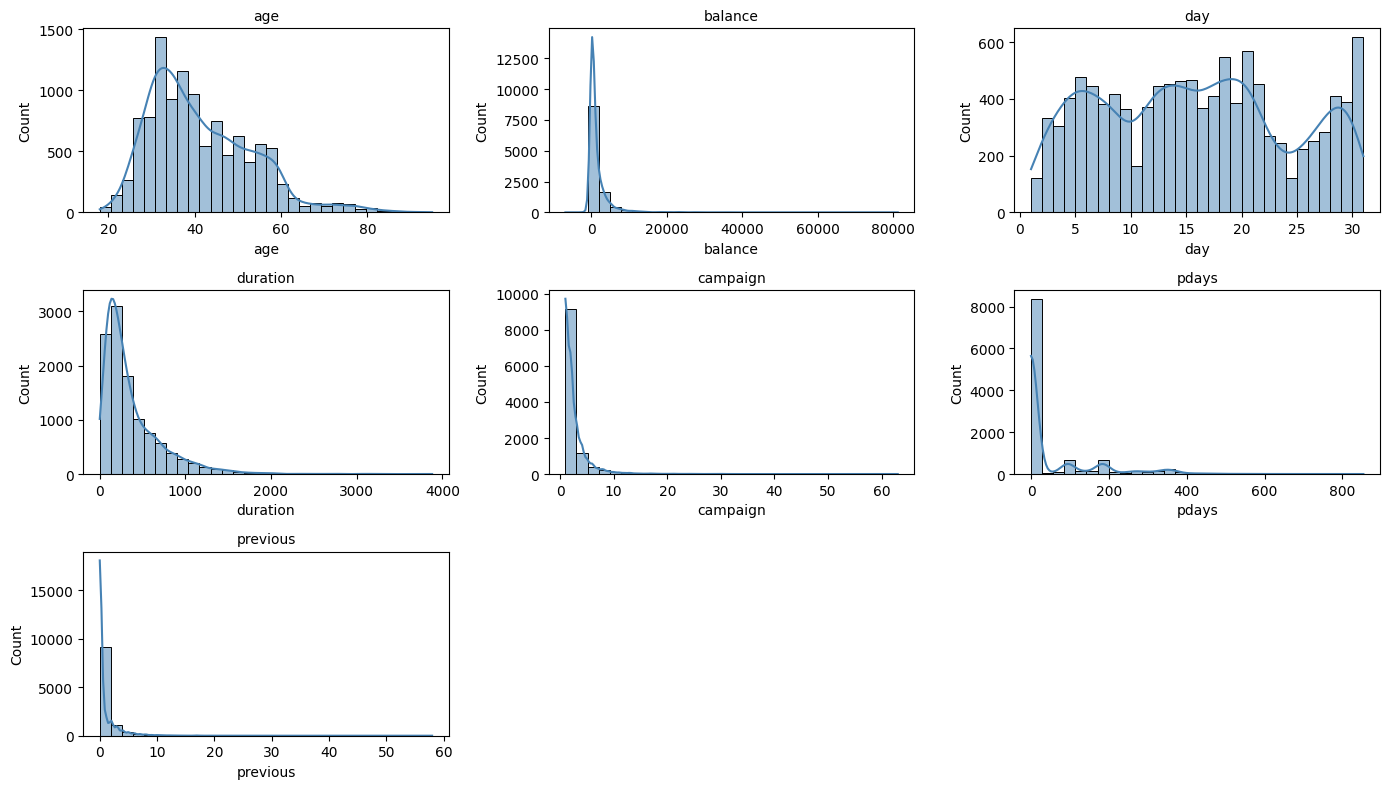

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics
display(df[num_cols].describe().T)

# Plot distributions
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()


# Step 9: Correlation Analysis

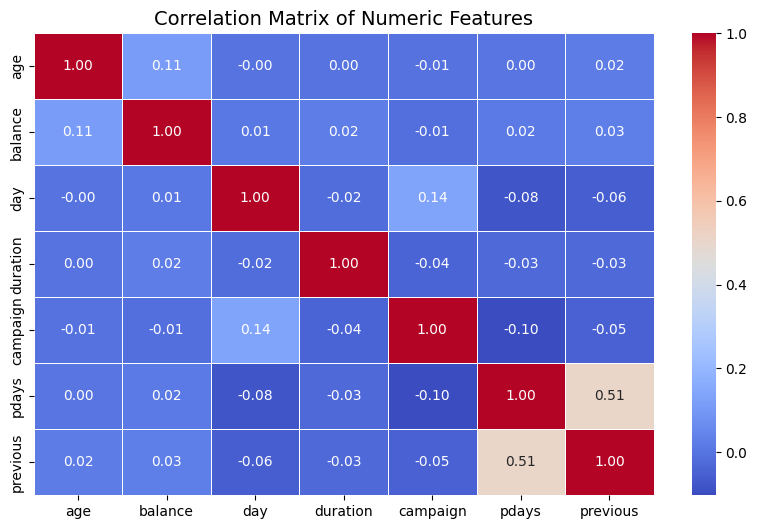

Top correlations with 'duration':
 duration    1.000000
balance     0.022436
age         0.000189
day        -0.018511
previous   -0.026716
pdays      -0.027392
campaign   -0.041557
Name: duration, dtype: float64


In [39]:
# Correlation matrix for numeric features
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

# Focus on top correlations with 'duration' (often key to conversions)
corr_target = corr['duration'].sort_values(ascending=False)
print("Top correlations with 'duration':\n", corr_target)


# Step 10: Categorical Feature Impact

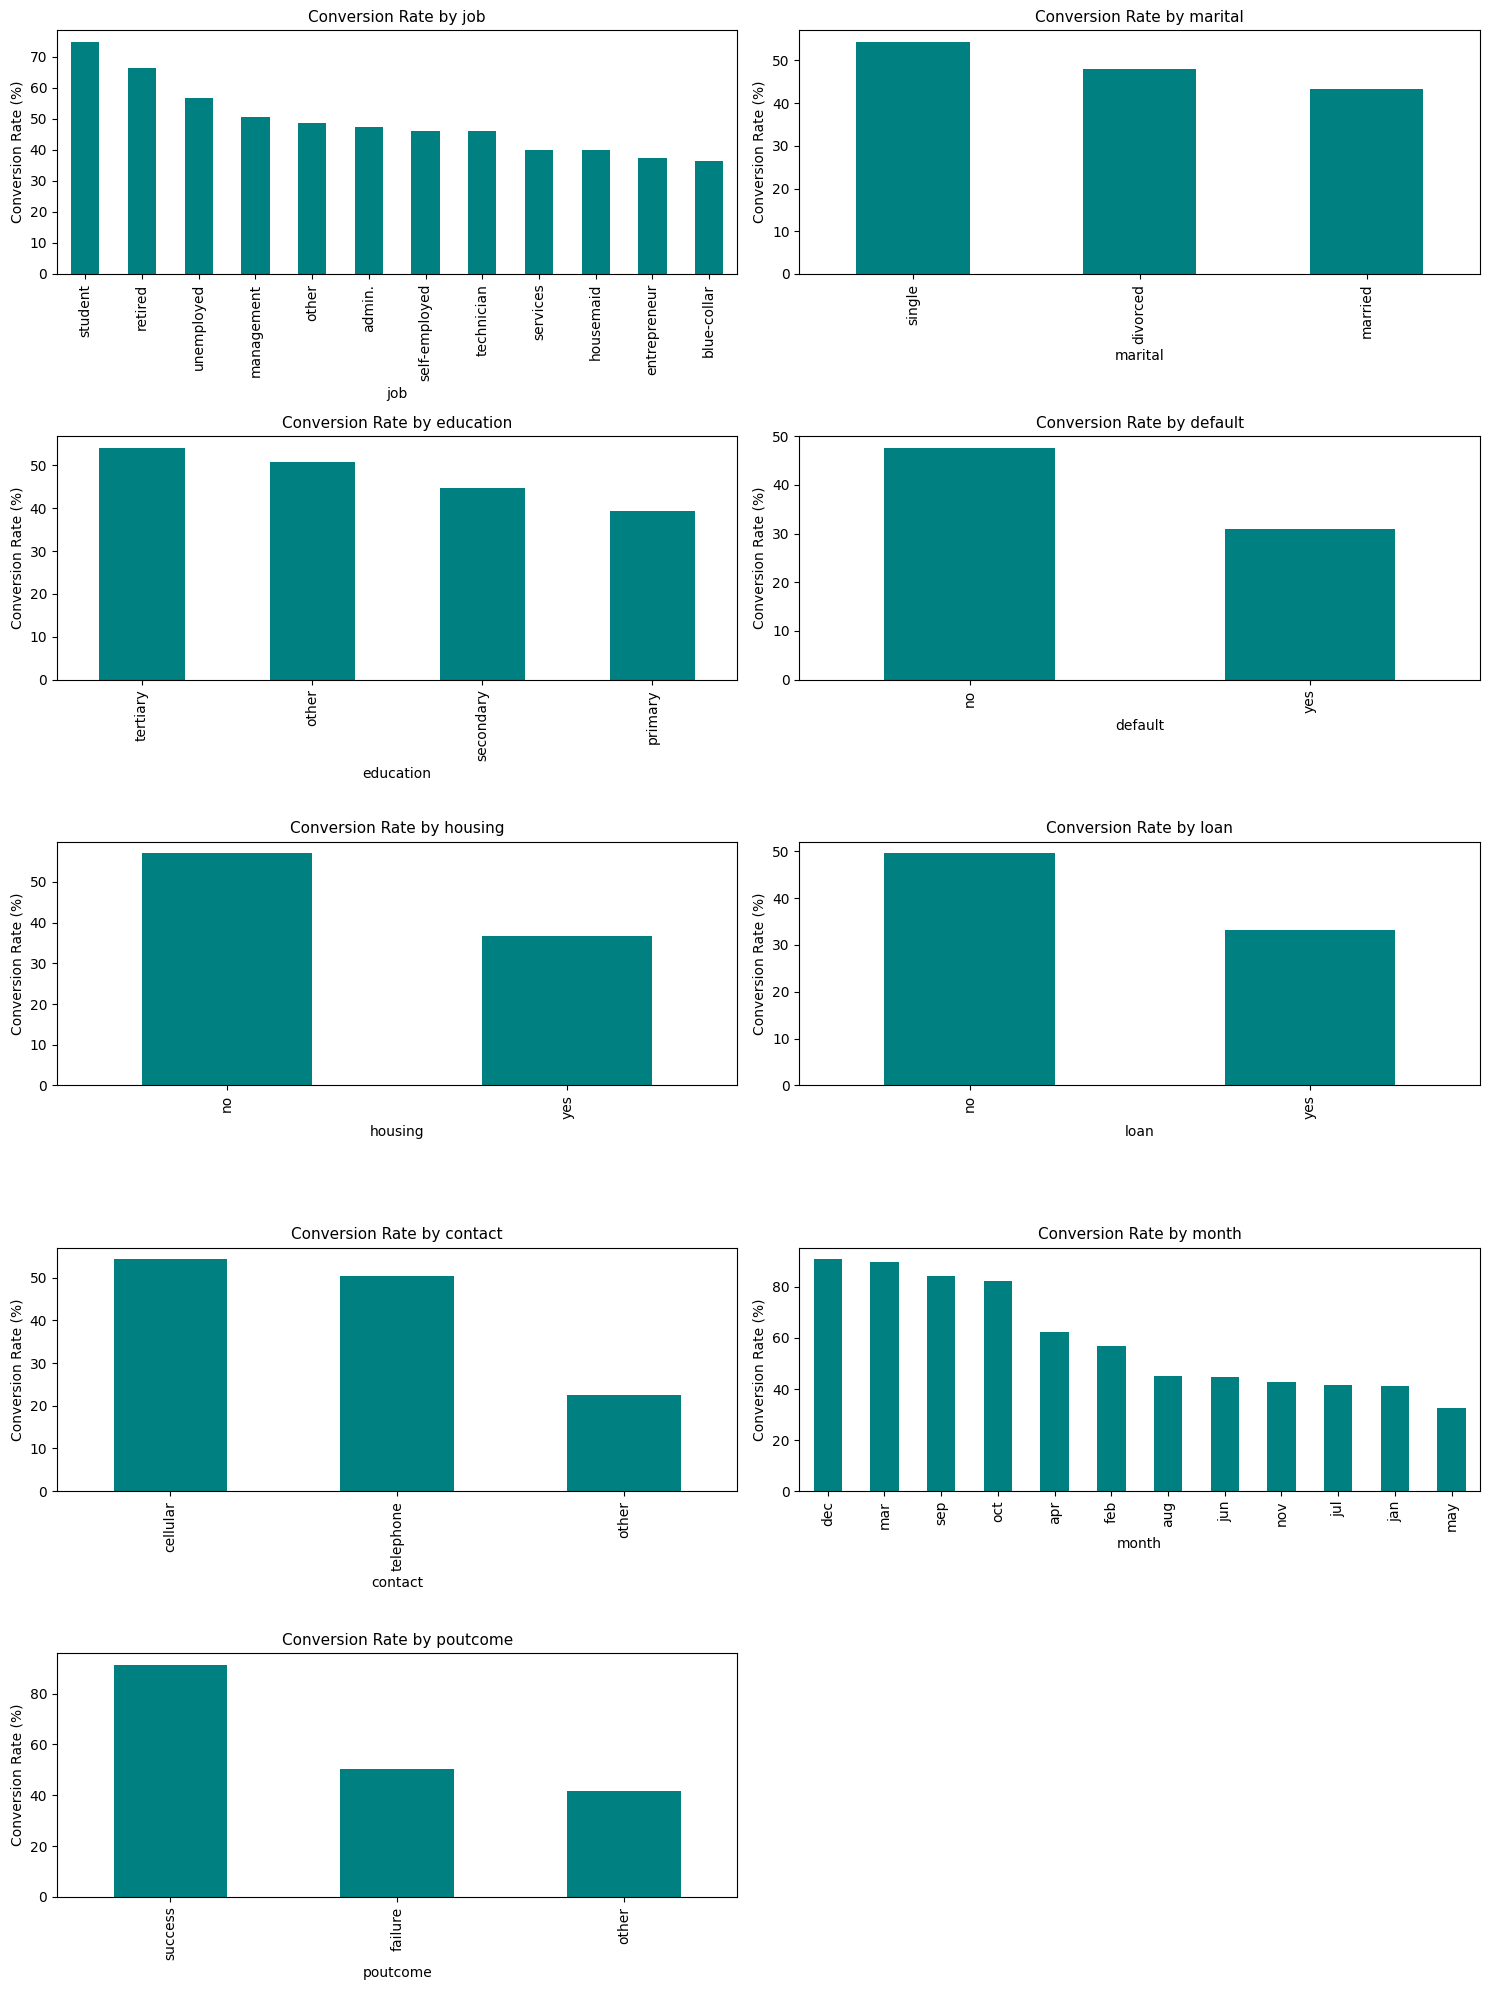

In [40]:
# List of categorical columns (excluding target)
cat_cols = df.select_dtypes(include='object').columns.drop('deposit')

# Plot conversion rates per category
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    conversion_rate = df.groupby(col)['deposit'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100
    conversion_rate.sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title(f'Conversion Rate by {col}', fontsize=11)
    plt.ylabel('Conversion Rate (%)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


# Step 11: Data Preprocessing and Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('deposit', axis=1)
y = df['deposit'].map({'yes': 1, 'no': 0})  # binary encode target

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "| Test set:", X_test.shape)


Training set: (8929, 16) | Test set: (2233, 16)


# Step 12: Logistic Regression Model Training and Evaluation

Accuracy: 0.827
ROC-AUC: 0.907

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1175
           1       0.83      0.80      0.81      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



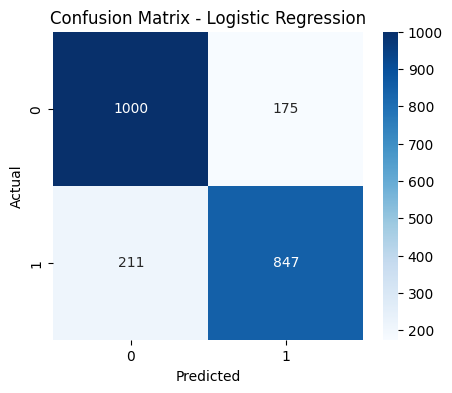

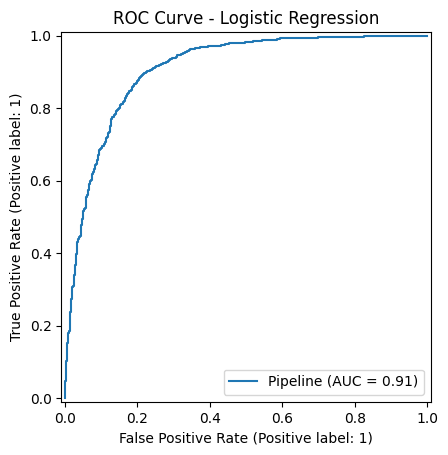

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Create the full pipeline (preprocessor + model)
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predictions
y_pred = logreg_pipeline.predict(X_test)
y_prob = logreg_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(logreg_pipeline, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


# Step 13: Logistic Regression Feature Importance

/tmp/ipython-input-1322324605.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Abs_Coefficient', y='Feature', palette='viridis')


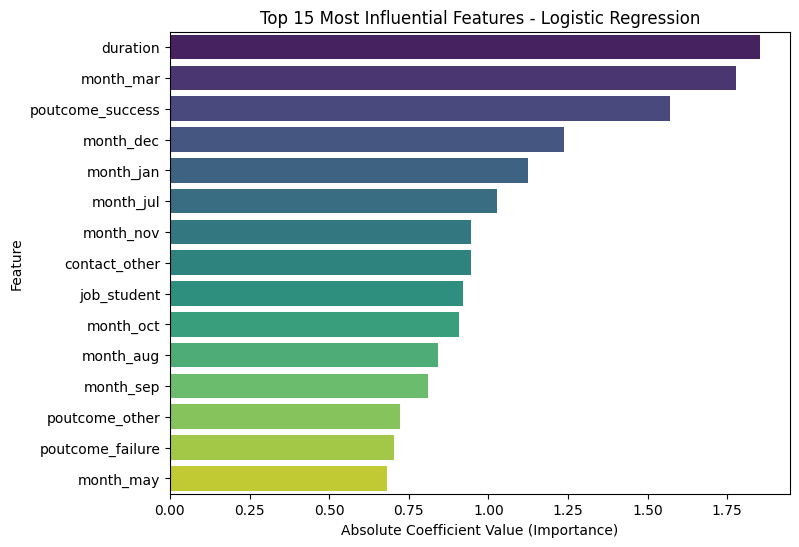

,Feature,Coefficient
3,duration,1.853967
42,month_mar,1.777321
49,poutcome_success,1.571618
37,month_dec,1.237041
39,month_jan,-1.125812
40,month_jul,-1.025844
44,month_nov,-0.946146
33,contact_other,-0.945348
16,job_student,0.919938
45,month_oct,0.909073


In [43]:
import numpy as np

# Extract the trained logistic regression model
model = logreg_pipeline.named_steps['model']

# Get one-hot encoder feature names
encoded_features = list(
    logreg_pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(cat_cols)
)

# Combine numeric + encoded feature names
all_features = list(num_cols) + encoded_features

# Create DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': model.coef_[0]
})

# Compute absolute importance and sort
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(15)

# Plot top 15 influential features
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title("Top 15 Most Influential Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()

# Display signed coefficients for interpretation
display(coef_df[['Feature', 'Coefficient']])


# Step 14: Random Forest Model Training and Evaluation

Accuracy: 0.852
ROC-AUC: 0.918

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1175
           1       0.81      0.89      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233



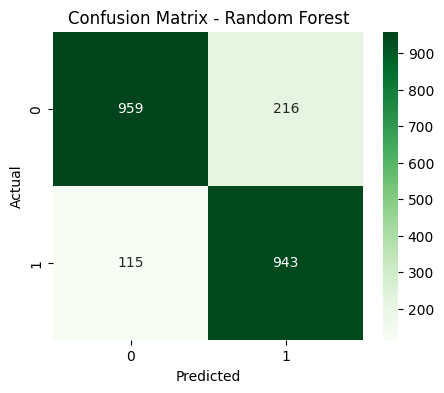

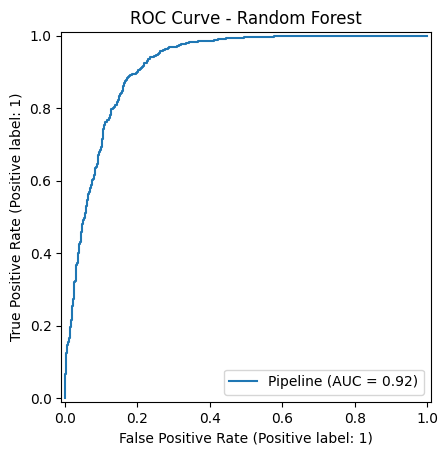

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ))
])

# Train model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# Step 15: Random Forest Feature Importance

/tmp/ipython-input-1114010433.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='crest')


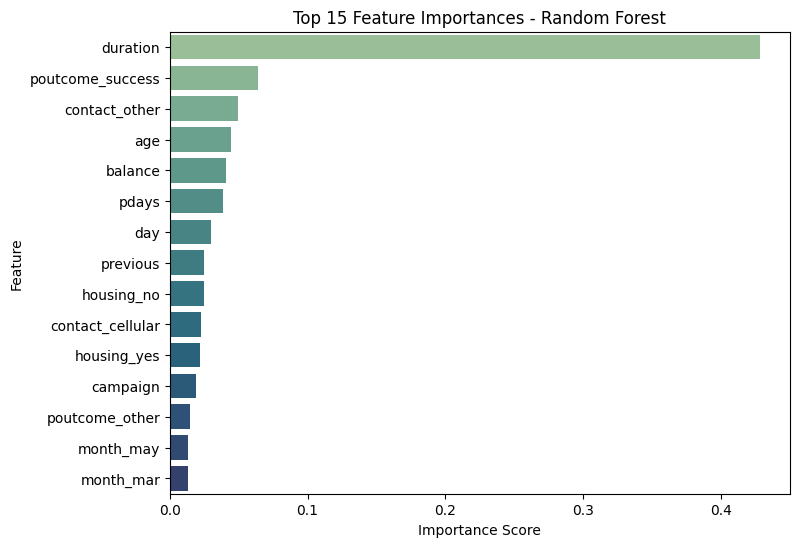

,Feature,Importance
3,duration,0.428913
49,poutcome_success,0.063812
33,contact_other,0.049583
0,age,0.044151
1,balance,0.040403
5,pdays,0.038655
2,day,0.029723
6,previous,0.025006
28,housing_no,0.024489
32,contact_cellular,0.022501


In [45]:
# Extract trained RF model
rf_model = rf_pipeline.named_steps['model']

# Get one-hot encoded feature names again
encoded_features = list(
    rf_pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(cat_cols)
)
all_features = list(num_cols) + encoded_features

# Create feature importance DataFrame
importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)

# Plot top 15
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='crest')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Display table
display(feat_imp)


# Step 16: Model Performance Comparison

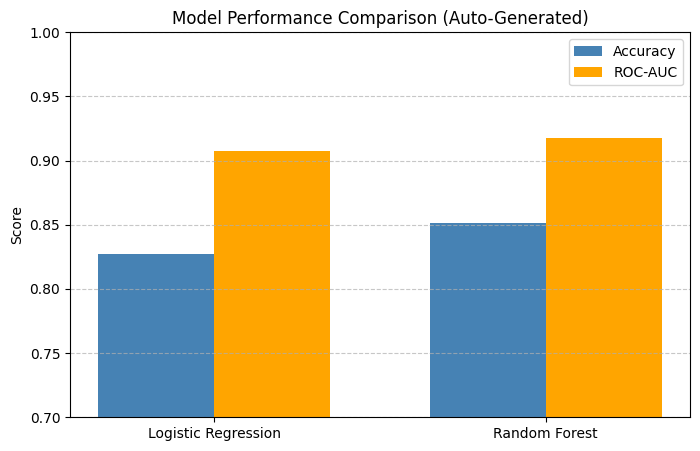

,accuracy,auc
Logistic Regression,0.827,0.907
Random Forest,0.852,0.918


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

# Evaluating both models
metrics = {
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, logreg_pipeline.predict(X_test)),
        "auc": roc_auc_score(y_test, logreg_pipeline.predict_proba(X_test)[:, 1])
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, rf_pipeline.predict(X_test)),
        "auc": roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
    }
}

# Extract values for plotting
model_names = list(metrics.keys())
accuracy = [metrics[m]["accuracy"] for m in model_names]
auc = [metrics[m]["auc"] for m in model_names]

# Plot
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='steelblue')
plt.bar(x + width/2, auc, width, label='ROC-AUC', color='orange')

plt.xticks(x, model_names)
plt.ylim(0.7, 1)
plt.title("Model Performance Comparison (Auto-Generated)")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display table version
import pandas as pd
pd.DataFrame(metrics).T.round(3)


# Project Summary

This project analyzes the **Bank Marketing Dataset** to predict whether a customer will subscribe to a term deposit after a marketing campaign.  
Using Python, pandas, and scikit-learn, the data was cleaned, explored, and modeled using both **Logistic Regression** and **Random Forest**.

**Key highlights:**
- Cleaned and prepared 11k records with no missing values.  
- Found that **call duration** and **previous campaign success** are the top predictors.  
- **Cellular contact** and campaigns run in **March, October, and December** showed better results.  
- Logistic Regression achieved **~83% accuracy (AUC 0.91)**, while Random Forest improved to **~85% accuracy (AUC 0.918)**.  
- Visualized feature importance, confusion matrices, and ROC curves for both models.

**Takeaway:**  
Longer calls, successful past contacts, and the right timing significantly increase term deposit conversions.  
The Random Forest model provides the best balance of performance and insight for future marketing strategy.
